# CNN WITH 1D DATA

In [20]:
from __future__ import print_function
  
from keras.models import Model
from keras.layers import Input, Dense, merge, Activation
from keras.utils import np_utils
import numpy as np
import keras 
from keras.callbacks import ReduceLROnPlateau
from pyts.transformation import GASF, GADF, MTF, RecurrencePlots
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(813306)

In [2]:
def build_resnet(input_shape, n_feature_maps, nb_classes):
    print ('build conv_x')
    x = Input(shape=(input_shape))
    print("input shape",input_shape)
    
    conv_x = keras.layers.normalization.BatchNormalization()(x)
    conv_x = keras.layers.Conv2D(n_feature_maps, 8, 1, border_mode='same')(conv_x)
    conv_x = keras.layers.normalization.BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps, 5, 1, border_mode='same')(conv_x)
    conv_y = keras.layers.normalization.BatchNormalization()(conv_y)
    conv_y = Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps, 3, 1, border_mode='same')(conv_y)
    conv_z = keras.layers.normalization.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps, 1, 1,border_mode='same')(x)
        shortcut_y = keras.layers.normalization.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.normalization.BatchNormalization()(x)
    print ('Merging skip connection')
    y = merge([shortcut_y, conv_z], mode='sum')
    y = Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, border_mode='same')(x1)
    conv_x = keras.layers.normalization.BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, border_mode='same')(conv_x)
    conv_y = keras.layers.normalization.BatchNormalization()(conv_y)
    conv_y = Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, border_mode='same')(conv_y)
    conv_z = keras.layers.normalization.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,border_mode='same')(x1)
        shortcut_y = keras.layers.normalization.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.normalization.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = merge([shortcut_y, conv_z], mode='sum')
    y = Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, border_mode='same')(x1)
    conv_x = keras.layers.normalization.BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, border_mode='same')(conv_x)
    conv_y = keras.layers.normalization.BatchNormalization()(conv_y)
    conv_y = Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, border_mode='same')(conv_y)
    conv_z = keras.layers.normalization.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,border_mode='same')(x1)
        shortcut_y = keras.layers.normalization.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.normalization.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = merge([shortcut_y, conv_z], mode='sum')
    y = Activation('relu')(y)
     
    full = keras.layers.pooling.GlobalAveragePooling2D()(y)   
    out = Dense(nb_classes, activation='softmax')(full)
    print ('        -- model was built.')
    return x, out

#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']


In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    #print(data[0:100])
    Y = data[:,0]
    X = data[:,1:]
    #print(X[0:100])
    return X, Y
   
nb_epochs = 150

In [4]:
def loaddataset():
    root="D:\\dataset\\"
    fname = 'ECG200'
    x_train, y_train = readucr(root+fname+'\\'+fname+'_TRAIN.txt')
    x_test, y_test = readucr(root+fname+'\\'+fname+'_TEST.txt')
    return x_train,y_train,x_test,y_test

In [5]:
x_train,y_train,x_test,y_test=loaddataset()

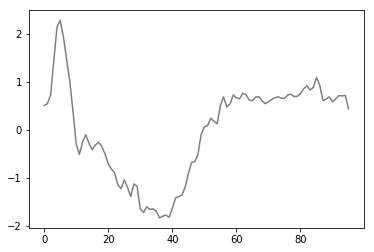

In [6]:
from pyts.visualization import plot_ts
plot_ts(x_train[0])


In [7]:
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [x_train.shape[0],x_train.shape[1]]) 
x_train1=x_train+noise
x_train=np.concatenate((x_train, x_train1), axis=0)
y_train=np.concatenate((y_train, y_train), axis=0)

print(x_train.shape, y_train.shape)

(200, 96) (200,)


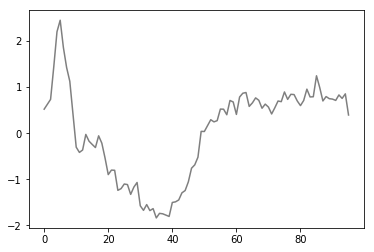

In [8]:
plot_ts(x_train1[0])

In [9]:
def whiteNoiseAugmentation(x,y, power=1):
    for i in range(0,power):
        noise = np.random.normal(mu, sigma, [x.shape[0],x.shape[1]]) 
        x1=x+noise
        x=np.concatenate((x, x1), axis=0)
        y=np.concatenate((y, y), axis=0)

        print(x.shape, y.shape)
    return x,y
    

# Gramian Angular Field(GAF)

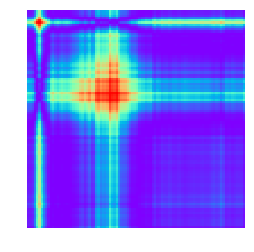

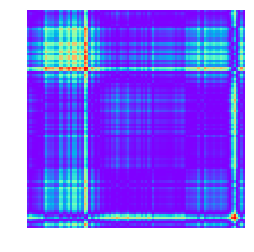

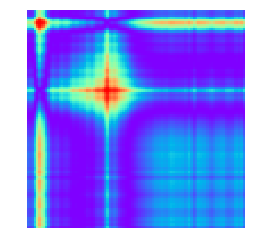

In [10]:
from pyts.visualization import plot_gasf

gasf=GASF(image_size=x_train.shape[1]//2, overlapping=False, scale='-1')
x_gasf=gasf.transform(x_train)
plot_gasf(x_train[0],image_size=x_train.shape[1],overlapping=False, scale='-1')
plot_gasf(x_train[1],image_size=x_train.shape[1],overlapping=False, scale='-1')
plot_gasf(x_train[2],image_size=x_train.shape[1],overlapping=False, scale='-1')


# Makov Transition FIeld(MTF)

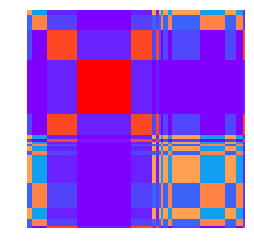

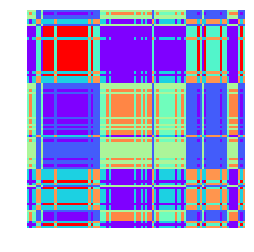

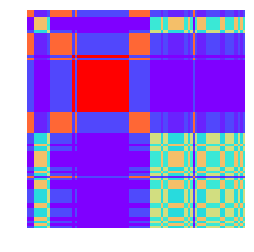

In [11]:
from pyts.visualization import plot_mtf

mtf=MTF(image_size=x_train.shape[1], n_bins=4, quantiles='empirical', overlapping=False)
X_mtf=mtf.transform(x_train)
plot_mtf(x_train[0], image_size=x_train.shape[1],n_bins=4, quantiles='empirical', overlapping=False)
plot_mtf(x_train[1], image_size=x_train.shape[1],n_bins=4, quantiles='empirical', overlapping=False)
plot_mtf(x_train[2], image_size=x_train.shape[1],n_bins=4, quantiles='empirical', overlapping=False)

# Recurrence Plot

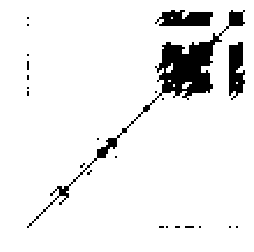

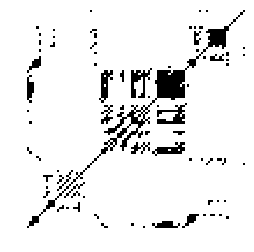

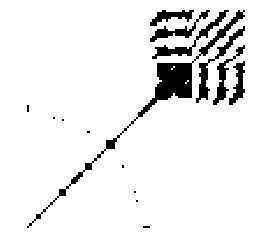

In [12]:
from pyts.visualization import plot_recurrence_plots
plot_recurrence_plots(x_train[0],dimension=3,epsilon='percentage_points',percentage=10)
plot_recurrence_plots(x_train[1],dimension=3,epsilon='percentage_points',percentage=10)
plot_recurrence_plots(x_train[2],dimension=3,epsilon='percentage_points',percentage=10)

rp=RecurrencePlots(dimension=3,epsilon='percentage_points',percentage=10)
x_rp=rp.transform(x_train)

In [17]:
def trainStep(method):
    
    x_train,y_train,x_test,y_test=loaddataset()
    
    x_train,y_train=whiteNoiseAugmentation(x_train,y_train,3) #400 
    x_test,y_test=whiteNoiseAugmentation(x_test,y_test,3) #400 
    
    
    if method =='GAF':
        gasf=GASF(image_size=x_train.shape[1]//2, overlapping=False, scale='-1')
        x_train=gasf.transform(x_train)
        x_test=gasf.transform(x_test)
        
    elif method =='MTF':
        mtf=MTF(image_size=x_train.shape[1], n_bins=4, quantiles='empirical', overlapping=False)
        x_train=mtf.transform(x_train)      
        x_test=mtf.transform(x_test) 
    elif method =='RP':
        rp=RecurrencePlots(dimension=3,epsilon='percentage_points',percentage=10)
        x_train=rp.transform(x_train)
        x_test=rp.transform(x_test)
        
        
    nb_classes = len(np.unique(y_test))
    batch_size = min(int(x_train.shape[0]/10), 16)

    y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
    y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)


    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean)/(x_train_std)

    x_test = (x_test - x_train_mean)/(x_train_std)


    print("dimension before:",x_train.shape)
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))
    print("dimension after:",x_train.shape)


    x , y = build_resnet(x_train.shape[1:], 64, nb_classes)
    model = Model(input=x, output=y)
    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                      patience=50, min_lr=0.0001) 
    
    print("train start....")

    hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=50,
              verbose=2, validation_data=(x_test, Y_test), callbacks=[reduce_lr])

    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

   

(200, 96) (200,)
(400, 96) (400,)
(800, 96) (800,)
(200, 96) (200,)
(400, 96) (400,)
(800, 96) (800,)
dimension before: (800, 48, 48)
dimension after: (800, 48, 48, 1)
build conv_x
input shape (48, 48, 1)
build conv_y


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (8, 1), padding="same")`
  import sys
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 1), padding="same")`
  if sys.path[0] == '':
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), padding="same")`


build conv_z
Merging skip connection
build conv_x


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 1), padding="same")`


build conv_y
build conv_z


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`


Merging skip connection
build conv_x
build conv_y
build conv_z


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), padding="same")`


Merging skip connection
        -- model was built.
train start....


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 800 samples, validate on 800 samples
Epoch 1/50
 - 9s - loss: 0.4041 - acc: 0.8213 - val_loss: 0.9275 - val_acc: 0.6713
Epoch 2/50
 - 7s - loss: 0.1896 - acc: 0.9213 - val_loss: 0.9087 - val_acc: 0.7087
Epoch 3/50
 - 7s - loss: 0.1764 - acc: 0.9313 - val_loss: 0.9750 - val_acc: 0.7825
Epoch 4/50
 - 7s - loss: 0.0790 - acc: 0.9725 - val_loss: 0.7361 - val_acc: 0.8237
Epoch 5/50
 - 7s - loss: 0.0608 - acc: 0.9762 - val_loss: 2.6569 - val_acc: 0.6562
Epoch 6/50
 - 7s - loss: 0.0436 - acc: 0.9888 - val_loss: 0.5628 - val_acc: 0.8313
Epoch 7/50
 - 7s - loss: 0.0446 - acc: 0.9888 - val_loss: 0.5293 - val_acc: 0.8562
Epoch 8/50
 - 7s - loss: 0.0305 - acc: 0.9938 - val_loss: 2.9061 - val_acc: 0.6625
Epoch 9/50
 - 7s - loss: 0.0249 - acc: 0.9938 - val_loss: 3.7007 - val_acc: 0.6687
Epoch 10/50
 - 7s - loss: 0.0287 - acc: 0.9888 - val_loss: 0.6708 - val_acc: 0.8237
Epoch 11/50
 - 7s - loss: 0.0114 - acc: 0.9975 - val_loss: 1.7005 - val_acc: 0.7612
Epoch 12/50
 - 7s - loss: 0.0279 - acc:

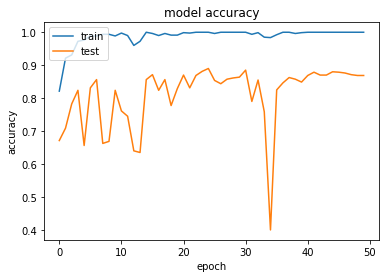

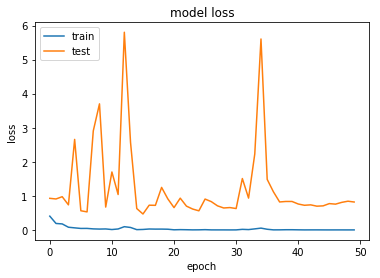

In [18]:
trainStep('GAF')

In [19]:
trainStep('MTF')

(200, 96) (200,)
(400, 96) (400,)
(800, 96) (800,)
(200, 96) (200,)
(400, 96) (400,)
(800, 96) (800,)
dimension before: (800, 96, 96)
dimension after: (800, 96, 96, 1)
build conv_x
input shape (96, 96, 1)
build conv_y


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (8, 1), padding="same")`
  import sys
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 1), padding="same")`
  if sys.path[0] == '':
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), padding="same")`


build conv_z
Merging skip connection
build conv_x


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 1), padding="same")`


build conv_y
build conv_z


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`


Merging skip connection
build conv_x
build conv_y
build conv_z


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), padding="same")`


Merging skip connection
        -- model was built.
train start....


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 800 samples, validate on 800 samples
Epoch 1/50


KeyboardInterrupt: 

In [ ]:
trainStep('RP')